<a href="https://colab.research.google.com/github/Greatreyhan/Flower_Classification/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')


228813984/228813984 [==============================] - 3s 0us/step


In [3]:
import os

base_dir = './'
daisy_dir = os.path.join(data_dir,'daisy')
dandelion_dir = os.path.join(data_dir,'dandelion')
roses_dir = os.path.join(data_dir,'roses')
sunflowers_dir = os.path.join(data_dir,'sunflowers')
tulips_dir = os.path.join(data_dir,'tulips')

daisy_training_dir = os.path.join(base_dir,'training/daisy')
os.makedirs(daisy_training_dir)
dandelion_training_dir = os.path.join(base_dir,'training/dandelion')
os.makedirs(dandelion_training_dir)
roses_training_dir = os.path.join(base_dir,'training/roses')
os.makedirs(roses_training_dir)
sunflowers_training_dir = os.path.join(base_dir,'training/sunflowers')
os.makedirs(sunflowers_training_dir)
tulips_training_dir = os.path.join(base_dir,'training/tulips')
os.makedirs(tulips_training_dir)

daisy_validation_dir = os.path.join(base_dir,'validation/daisy')
os.makedirs(daisy_validation_dir)
dandelion_validation_dir = os.path.join(base_dir,'validation/dandelion')
os.makedirs(dandelion_validation_dir)
roses_validation_dir = os.path.join(base_dir,'validation/roses')
os.makedirs(roses_validation_dir)
sunflowers_validation_dir = os.path.join(base_dir,'validation/sunflowers')
os.makedirs(sunflowers_validation_dir)
tulips_validation_dir = os.path.join(base_dir,'validation/tulips')
os.makedirs(tulips_validation_dir)

daisy_testing_dir = os.path.join(base_dir,'testing/daisy')
os.makedirs(daisy_testing_dir)
dandelion_testing_dir = os.path.join(base_dir,'testing/dandelion')
os.makedirs(dandelion_testing_dir)
roses_testing_dir = os.path.join(base_dir,'testing/roses')
os.makedirs(roses_testing_dir)
sunflowers_testing_dir = os.path.join(base_dir,'testing/sunflowers')
os.makedirs(sunflowers_testing_dir)
tulips_testing_dir = os.path.join(base_dir,'testing/tulips')
os.makedirs(tulips_testing_dir)


In [4]:
print('total training daisy images :', len(os.listdir(daisy_dir)))
print('total training dandelion images :', len(os.listdir(dandelion_dir)))
print('total training roses images :', len(os.listdir(roses_dir)))
print('total training sunflowers images :', len(os.listdir(sunflowers_dir)))
print('total training tulips images :', len(os.listdir(tulips_dir)))

total training daisy images : 633
total training dandelion images : 898
total training roses images : 641
total training sunflowers images : 699
total training tulips images : 799


In [5]:
f_daisy = [os.rename(os.path.join(daisy_dir, fname), os.path.join(daisy_training_dir, fname)) for fname in os.listdir(daisy_dir)[:int(2*len(os.listdir(daisy_dir))/3)]]
f_dandelion = [os.rename(os.path.join(dandelion_dir, fname), os.path.join(dandelion_training_dir, fname)) for fname in os.listdir(dandelion_dir)[:int(2*len(os.listdir(dandelion_dir))/3)]]
f_roses = [os.rename(os.path.join(roses_dir, fname), os.path.join(roses_training_dir, fname)) for fname in os.listdir(roses_dir)[:int(2*len(os.listdir(roses_dir))/3)]]
f_sunflowers = [os.rename(os.path.join(sunflowers_dir, fname), os.path.join(sunflowers_training_dir, fname)) for fname in os.listdir(sunflowers_dir)[:int(2*len(os.listdir(sunflowers_dir))/3)]]
f_tulips = [os.rename(os.path.join(tulips_dir, fname), os.path.join(tulips_training_dir, fname)) for fname in os.listdir(tulips_dir)[:int(2*len(os.listdir(tulips_dir))/3)]]

In [6]:
print('total training daisy images :', len(os.listdir(daisy_training_dir)))
print('total training dandelion images :', len(os.listdir(dandelion_training_dir)))
print('total training roses images :', len(os.listdir(roses_training_dir)))
print('total training sunflowers images :', len(os.listdir(sunflowers_training_dir)))
print('total training tulips images :', len(os.listdir(tulips_training_dir)))

total training daisy images : 422
total training dandelion images : 598
total training roses images : 427
total training sunflowers images : 466
total training tulips images : 532


In [7]:
f_daisy = [os.rename(os.path.join(daisy_dir, fname), os.path.join(daisy_validation_dir, fname)) for fname in os.listdir(daisy_dir)]
f_dandelion = [os.rename(os.path.join(dandelion_dir, fname), os.path.join(dandelion_validation_dir, fname)) for fname in os.listdir(dandelion_dir)]
f_roses = [os.rename(os.path.join(roses_dir, fname), os.path.join(roses_validation_dir, fname)) for fname in os.listdir(roses_dir)]
f_sunflowers = [os.rename(os.path.join(sunflowers_dir, fname), os.path.join(sunflowers_validation_dir, fname)) for fname in os.listdir(sunflowers_dir)]
f_tulips = [os.rename(os.path.join(tulips_dir, fname), os.path.join(tulips_validation_dir, fname)) for fname in os.listdir(tulips_dir)]

In [8]:
print('total validation daisy images :', len(os.listdir(daisy_validation_dir)))
print('total validation dandelion images :', len(os.listdir(dandelion_validation_dir)))
print('total validation roses images :', len(os.listdir(roses_validation_dir)))
print('total validation sunflowers images :', len(os.listdir(sunflowers_validation_dir)))
print('total validation tulips images :', len(os.listdir(tulips_validation_dir)))

total validation daisy images : 211
total validation dandelion images : 300
total validation roses images : 214
total validation sunflowers images : 233
total validation tulips images : 267


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = os.path.join(base_dir,'training')
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
VALIDATION_DIR = os.path.join(base_dir,'validation')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2445 images belonging to 5 classes.
Found 1225 images belonging to 5 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/50
20/20 [==============================] - 20s 999ms/step - loss: 0.6404 - accuracy: 0.7431 - val_loss: 0.6718 - val_accuracy: 0.7698
Epoch 2/50
20/20 [==============================] - 21s 1s/step - loss: 0.6005 - accuracy: 0.7583 - val_loss: 0.6189 - val_accuracy: 0.7487
Epoch 3/50
20/20 [==============================] - 19s 972ms/step - loss: 0.6021 - accuracy: 0.7685 - val_loss: 0.5858 - val_accuracy: 0.7725
Epoch 4/50
20/20 [==============================] - 21s 1s/step - loss: 0.6015 - accuracy: 0.7648 - val_loss: 0.8135 - val_accuracy: 0.6984
Epoch 5/50
20/20 [==============================] - 20s 984ms/step - loss: 0.5964 - accuracy: 0.7685 - val_loss: 0.7344 - val_accuracy: 0.7354
Epoch 6/50
20/20 [==============================] - 21s 1s/step - loss: 0.5700 - accuracy: 0.7779 - val_loss: 0.7649 - val_accuracy: 0.7196
Epoch 7/50
20/20 [==============================] - 20s 977ms/step - loss: 0.5629 - accuracy: 0.7779 - val_loss: 0.7462 - val_accuracy: 0.7593
Epoch 8/

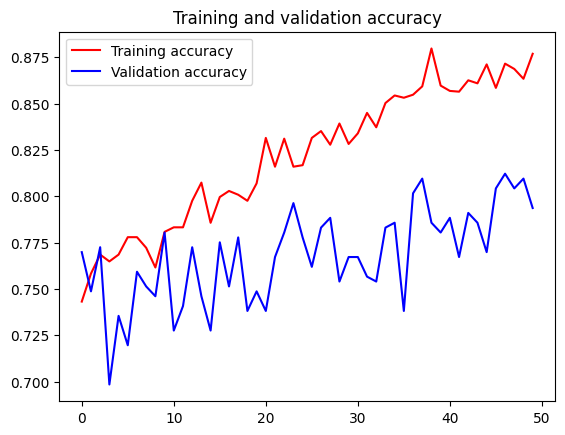

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [19]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving herbert-goetsch-SGKQh9wNgAk-unsplash1500.1000-1080x675.jpg to herbert-goetsch-SGKQh9wNgAk-unsplash1500.1000-1080x675.jpg
1/1 [==============================] - 0s 25ms/step
herbert-goetsch-SGKQh9wNgAk-unsplash1500.1000-1080x675.jpg
[[1. 0. 0. 0. 0.]]


In [38]:
y_hat = model.predict(validation_generator, batch_size=10)
y_hat

10/10 [==============================] - 3s 289ms/step


array([[1.40765635e-03, 9.98577237e-01, 1.21910116e-05, 1.33248341e-06,
        1.51188704e-06],
       [2.45733943e-04, 6.30571662e-07, 9.66212511e-01, 6.66067535e-06,
        3.35343629e-02],
       [2.70504052e-06, 4.89776085e-06, 9.99545038e-01, 6.45268117e-10,
        4.47282364e-04],
       ...,
       [4.88945923e-04, 1.06622435e-08, 1.99228302e-02, 2.47781799e-07,
        9.79587913e-01],
       [3.89180593e-02, 1.69170462e-03, 5.85109112e-04, 9.58523452e-01,
        2.81672459e-04],
       [6.97670132e-02, 9.28763092e-01, 1.29217660e-04, 3.22851527e-04,
        1.01778202e-03]], dtype=float32)

In [32]:
prediction_class = np.argmax(y_hat, axis=1)
prediction_class

array([2, 4, 2, ..., 1, 1, 4])

In [34]:
validation_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [36]:
tf.math.confusion_matrix(validation_generator.classes,prediction_class)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[32, 54, 31, 48, 46],
       [51, 72, 44, 64, 69],
       [46, 37, 46, 48, 37],
       [46, 48, 31, 52, 56],
       [40, 60, 42, 54, 71]], dtype=int32)>